# Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

**Тариф «Смарт»**

 - Ежемесячная плата: 550 рублей

 - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

 - Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
 
**Тариф «Ультра»**
 
 - Ежемесячная плата: 1950 рублей

 - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

 - Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

# Примечание:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

# Описание данных

**Таблица users (информация о пользователях):**

 - user_id — уникальный идентификатор пользователя
 
 - first_name — имя пользователя
 
 - last_name — фамилия пользователя
 
 - age — возраст пользователя (годы)
 
 - reg_date — дата подключения тарифа (день, месяц, год)
 
 - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
 
 - city — город проживания пользователя
 
 - tarif — название тарифного плана
 
**Таблица calls (информация о звонках):**

 - id — уникальный номер звонка
 
 - call_date — дата звонка
 
 - duration — длительность звонка в минутах
 
 - user_id — идентификатор пользователя, сделавшего звонок
 
**Таблица messages (информация о сообщениях):**

 - id — уникальный номер сообщения
 
 - message_date — дата сообщения
 
 - user_id — идентификатор пользователя, отправившего сообщение
 
**Таблица internet (информация об интернет-сессиях):**

 - id — уникальный номер сессии
 
 - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
 
 - session_date — дата интернет-сессии
 
 - user_id — идентификатор пользователя
 
**Таблица tariffs (информация о тарифах):**

 - tariff_name — название тарифа
 
 - rub_monthly_fee — ежемесячная абонентская плата в рублях
 
 - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
 
 - messages_included — количество сообщений в месяц, включённых в абонентскую плату
 
 - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 
 - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
 
 - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
 
 - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Изучение данных из файла

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Натсройка отображения чисел по умолчанию
pd.set_option('display.float_format', '{:,.3f}'.format)

In [2]:
# Загрузим все датасеты
calls = pd.read_csv('/datasets/calls.csv')
# Используем атрибут index_col, так как данные были неккоректно записаны в csv файл
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
# Посмотрим на данные
datasets = [calls, internet, messages, tariffs, users]
for dataset in datasets:
    display(dataset.head())
    print()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.000,1000
1,1000_1,2018-08-17,0.000,1000
2,1000_2,2018-06-11,2.850,1000
3,1000_3,2018-09-21,13.800,1000
4,1000_4,2018-12-15,5.180,1000


,id,mb_used,session_date,user_id
0,1000_0,112.950,2018-11-25,1000
1,1000_1,"1,052.810",2018-09-07,1000
2,1000_2,"1,197.260",2018-06-25,1000
3,1000_3,550.270,2018-08-22,1000
4,1000_4,302.560,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
# Напишем функцию для предпросотра данных
def get_info(df):
    # Получим информацию о столбцах
    df.info()
    print('===================================================================================================================')
    # Построиим гистограммы для каждого столбца
    for col in df.columns:
        fig, ax = plt.subplots(figsize=(16, 4))  
        plt.title(col)
        if (df[col].dtypes == 'float') | (df[col].dtypes == 'int'):
            df[col].hist(ax=ax)        
        else:
            df[col].value_counts().plot(ax=ax, kind='hist') 
    print('===================================================================================================================')        
    # Проанализируем уникальные значения каждого столбца
    for col in df.columns:
        print(f'Уникальные значения столбца {col}:')
        print(df[col].unique())
        print(f'Количество вхождений каждого значения столбца {col}')
        print(df[col].value_counts(dropna=False))
        print('===================================================================================================================')
    

**Таблица *calls***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
Уникальные значения столбца id:
['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']
Количество вхождений каждого значения столбца id
1277_320    1
1378_720    1
1260_348    1
1393_363    1
1453_186    1
           ..
1127_95     1
1331_567    1
1000_346    1
1395_348    1
1099_493    1
Name: id, Length: 202607, dtype: int64
Уникальные значения столбца call_date:
['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '

,duration,user_id
count,"202,607.000","202,607.000"
mean,6.756,"1,253.941"
std,5.843,144.723
min,0.000,"1,000.000"
25%,1.300,"1,126.000"
50%,6.000,"1,260.000"
75%,10.700,"1,379.000"
max,38.000,"1,499.000"


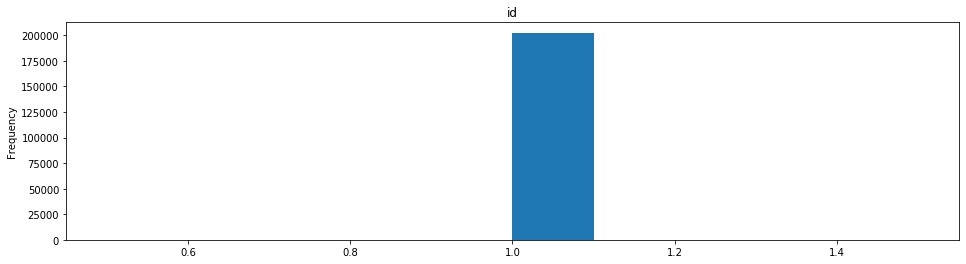

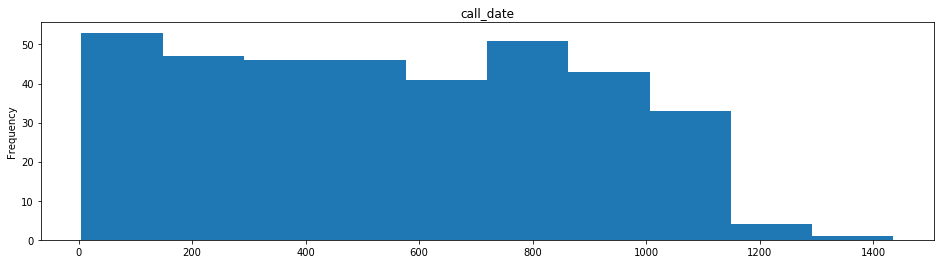

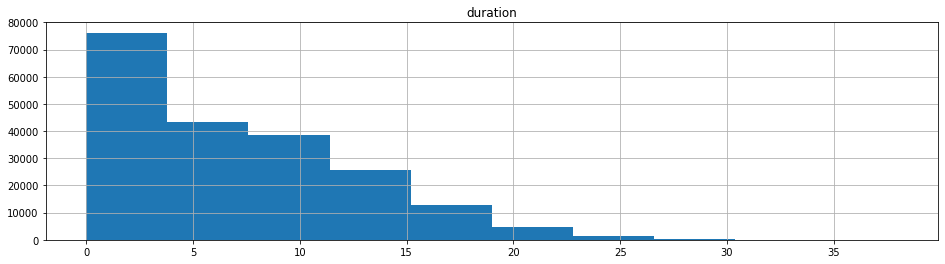

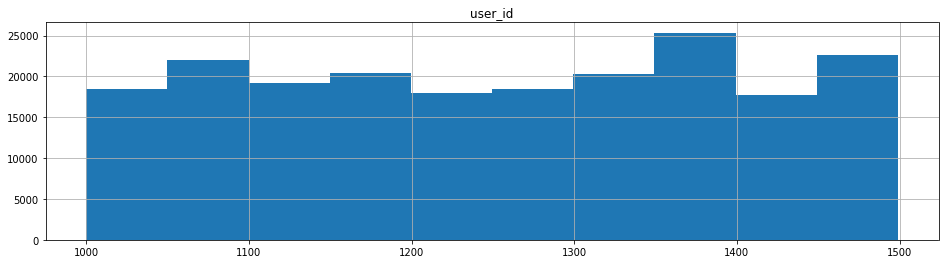

In [5]:
get_info(calls)
calls.describe()

**Выводы:**

Стобец *id*: Без замечаний

Столбец *call_date*: Поменять тип на *datetime*

Столбец *duration*: Округлить значения в большую сторону и перевести в тип int, так как при расчете стоимости и так округляется до минут

Столбец *user_id*: Без замечаний

**Таблица *internet***

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
Уникальные значения столбца id:
['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']
Количество вхождений каждого значения столбца id
1354_270    1
1480_97     1
1415_71     1
1180_156    1
1049_52     1
           ..
1453_184    1
1465_421    1
1465_303    1
1137_28     1
1075_103    1
Name: id, Length: 149396, dtype: int64
Уникальные значения столбца mb_used:
[ 112.95 1052.81 1197.26 ...  460.75  247.59   23.72]
Количество вхождений каждого значения столбца mb_used
0.000      19598
197.560        9
447.300        9
335.910        9
108.950        8
           ...  
72.490         1
846.220        1
429.170        1
899.030        1
483.870        1


,mb_used,user_id
count,"149,396.000","149,396.000"
mean,370.192,"1,252.100"
std,278.301,144.051
min,0.000,"1,000.000"
25%,138.188,"1,130.000"
50%,348.015,"1,251.000"
75%,559.553,"1,380.000"
max,"1,724.830","1,499.000"


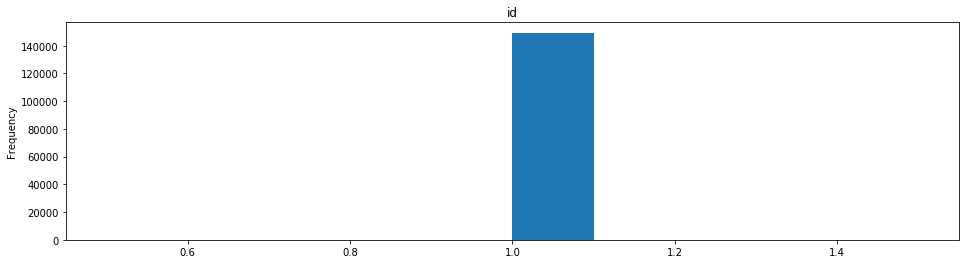

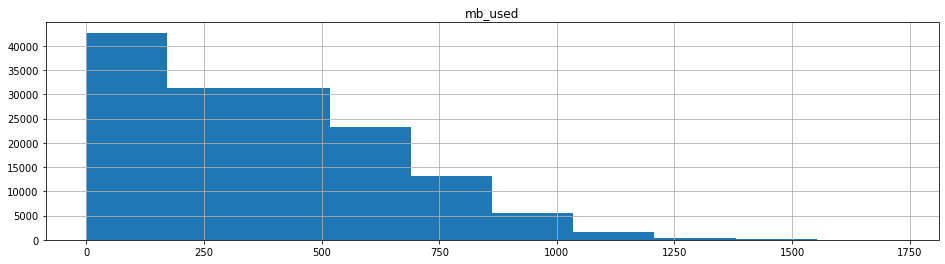

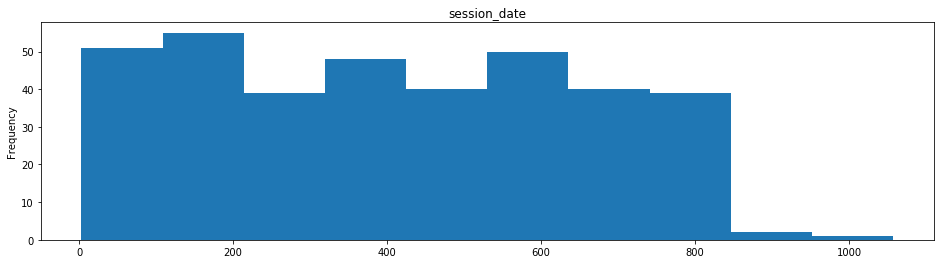

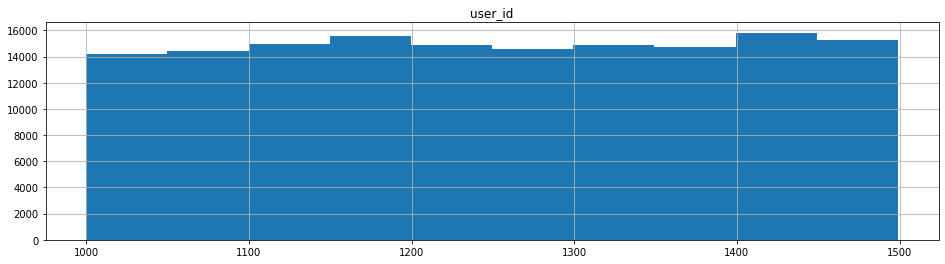

In [6]:
get_info(internet)
internet.describe()

**Выводы:**

Столбец *id*: Без замечаний

Столбец *mb_used*: Округлить до гигабайт в большую сторону и перевести в тип *int*

Столбец *session_date*: Конвертировать в тип *datetime*

Столбец *user_id*: Без замечаний

**Таблица *messages***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
Уникальные значения столбца id:
['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']
Количество вхождений каждого значения столбца id
1354_270    1
1015_116    1
1271_131    1
1054_98     1
1282_216    1
           ..
1265_150    1
1145_304    1
1302_76     1
1484_416    1
1076_804    1
Name: id, Length: 123036, dtype: int64
Уникальные значения столбца message_date:
['2018-06-27' '2018-10-08' '2018-08-04' '2018-06-16' '2018-12-05'
 '2018-06-20' '2018-11-19' '2018-10-29' '2018-06-25' '2018-12-18'
 '2018-05-30' '2018-07-06' '2018-08-20' '2018-10-30' '2018-09-14'
 '2018-08-28' '2018-06-29' '2018-07-07' '2018-05-29' '2018-05-28'
 '2018-08-15' '2018-07-29' '2018-12-07' '2018-12-25' '2018-10-31'
 '2018-07-30

,user_id
count,"123,036.000"
mean,"1,256.989"
std,143.524
min,"1,000.000"
25%,"1,134.000"
50%,"1,271.000"
75%,"1,381.000"
max,"1,499.000"


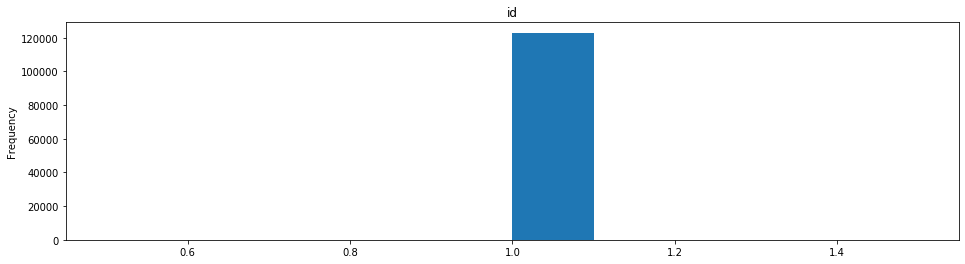

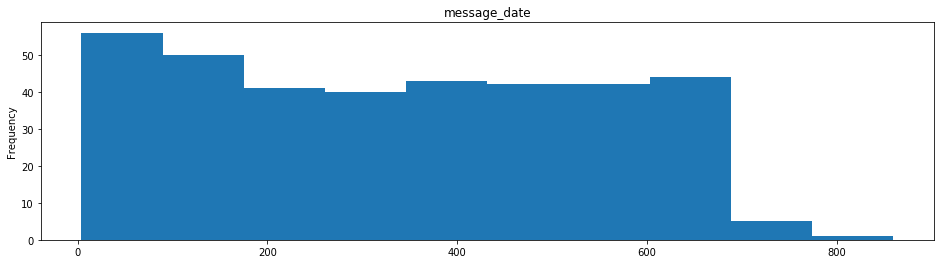

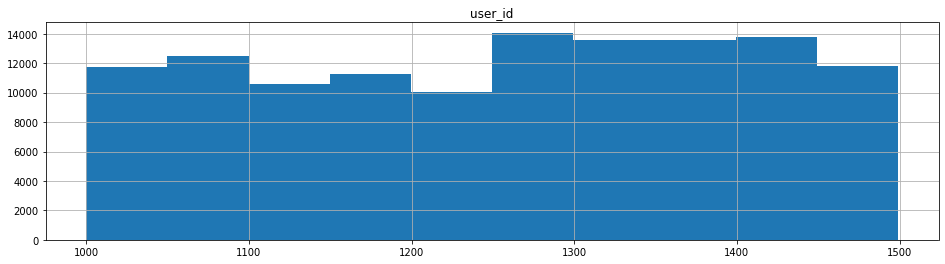

In [7]:
get_info(messages)
messages.describe()

**Выводы:**

Столбец *id*: Без замечаний

Столбец *message_date*: Конвертировать в тип *datetime*

Столбец *user_id*: Без замечаний

**Таблица *tariffs***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
Уникальные значения столбца messages_included:
[  50 1000]
Количество вхождений каждого значения столбца messages_included
50      1
1000    1
Name: messages_included, dtype: int64
Уникальные значения столбца mb_per_month_included:
[15360 30720]
Количество вхождений каждого значения столбца mb_per_month_included
30720    1
15360    1
Name: mb_per_month_included, dtype: int64
Уникальные значения столбца minutes_included:
[ 500 3000]
Количество вхождений каждого значения столбца minutes_included
3000    1

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000,2.000,2.000,2.000,2.000,2.000,2.000
mean,525.000,"23,040.000","1,750.000","1,250.000",175.000,2.000,2.000
std,671.751,"10,861.160","1,767.767",989.949,35.355,1.414,1.414
min,50.000,"15,360.000",500.000,550.000,150.000,1.000,1.000
25%,287.500,"19,200.000","1,125.000",900.000,162.500,1.500,1.500
50%,525.000,"23,040.000","1,750.000","1,250.000",175.000,2.000,2.000
75%,762.500,"26,880.000","2,375.000","1,600.000",187.500,2.500,2.500
max,"1,000.000","30,720.000","3,000.000","1,950.000",200.000,3.000,3.000


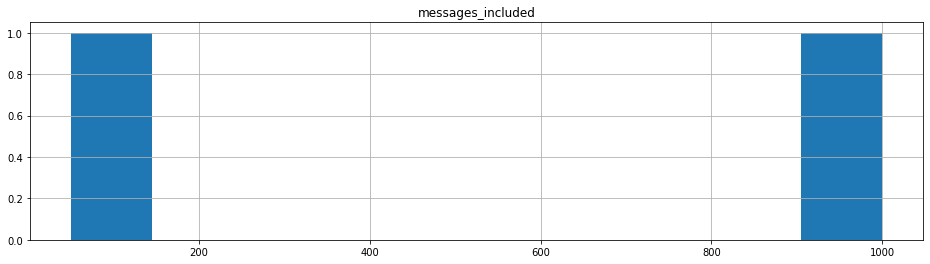

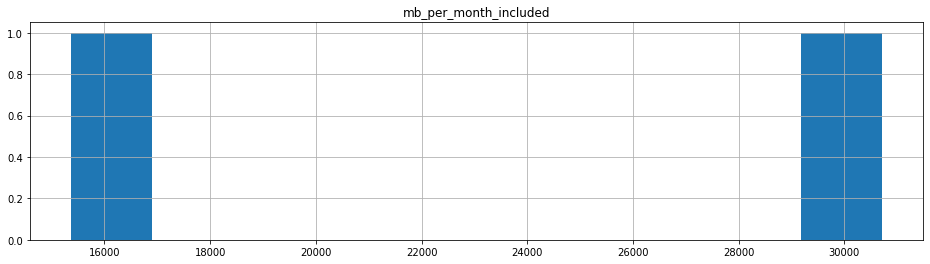

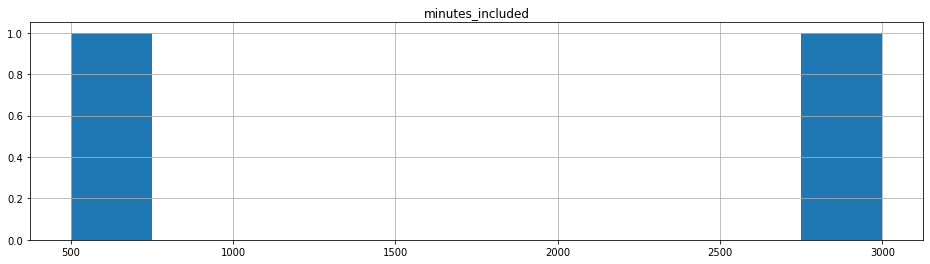

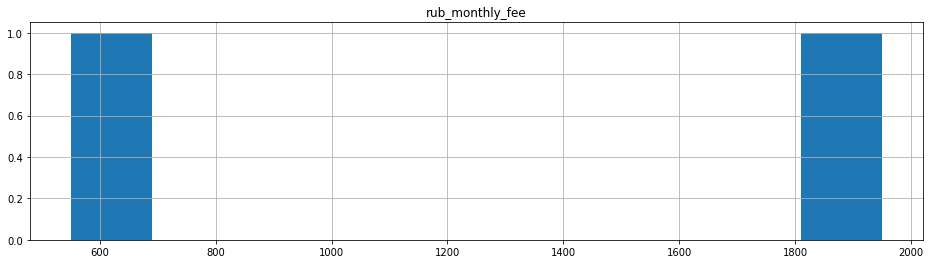

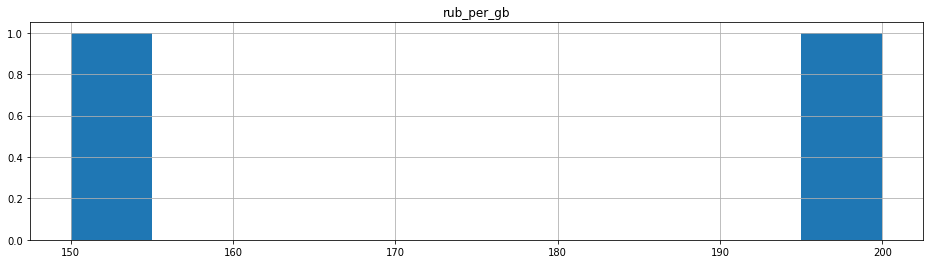

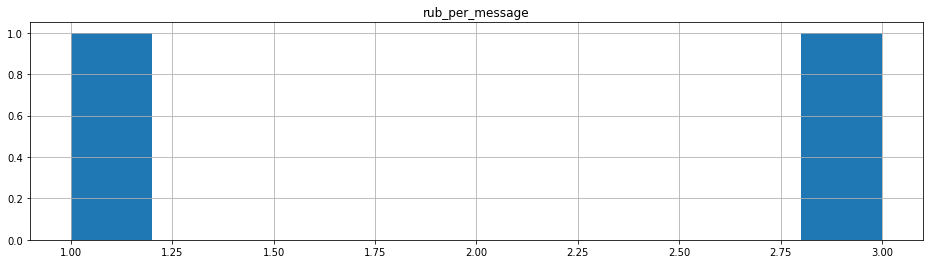

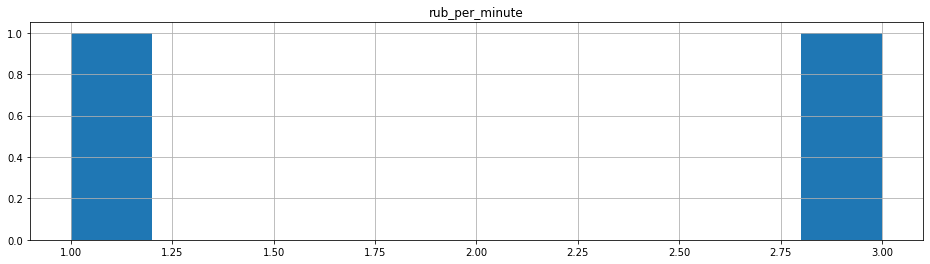

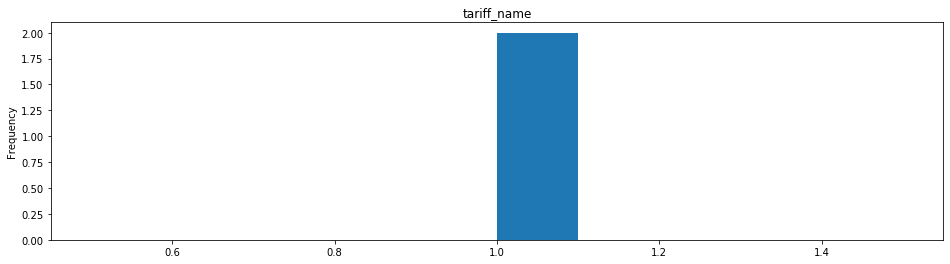

In [8]:
get_info(tariffs)
tariffs.describe()

**Выводы:**

Все столбцы: Без замечаний

**Таблица *users***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Уникальные значения столбца user_id:
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1

,user_id,age
count,500.000,500.000
mean,"1,249.500",46.588
std,144.482,16.668
min,"1,000.000",18.000
25%,"1,124.750",32.000
50%,"1,249.500",46.000
75%,"1,374.250",62.000
max,"1,499.000",75.000


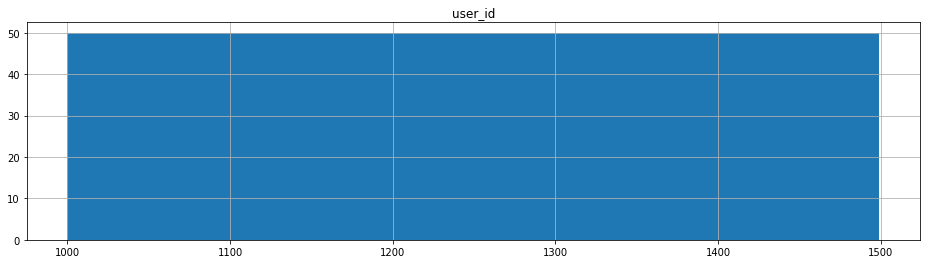

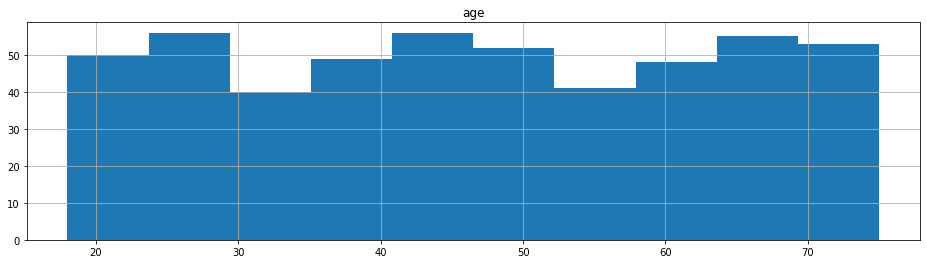

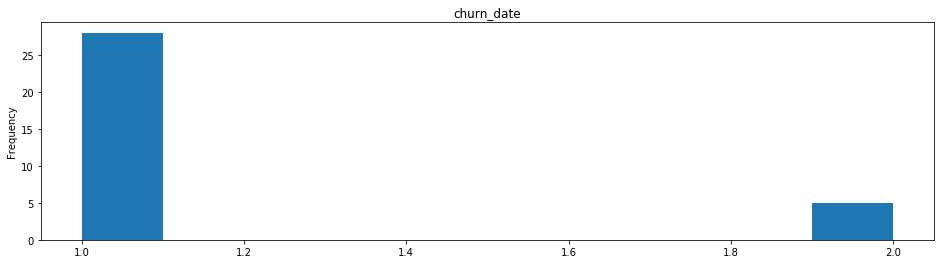

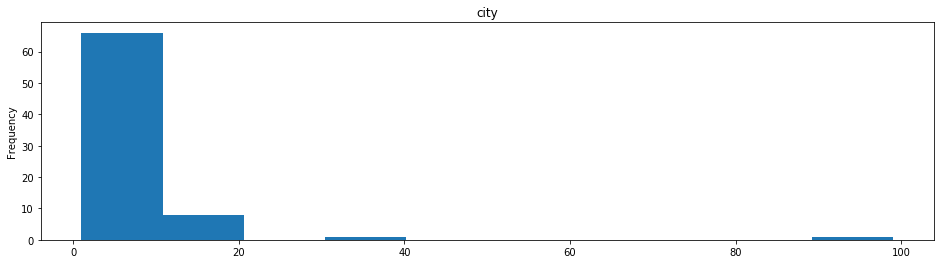

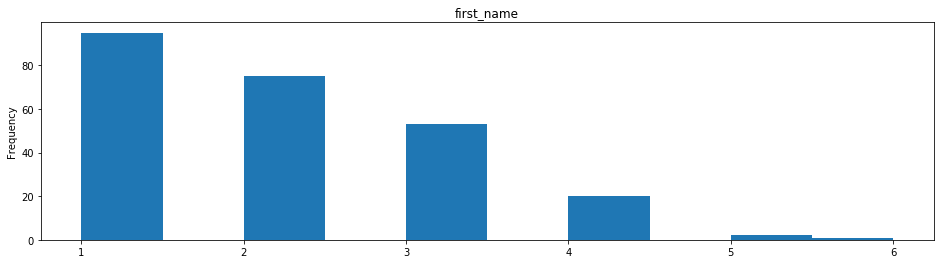

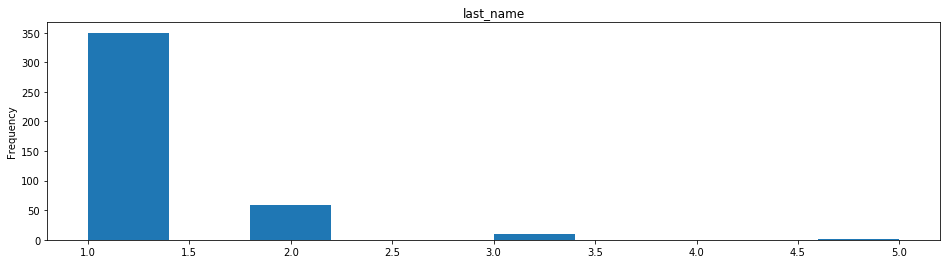

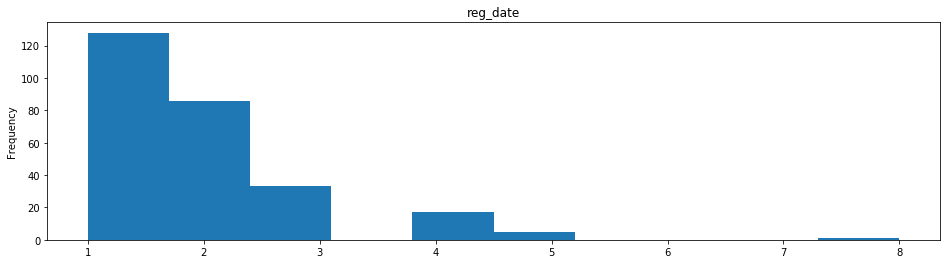

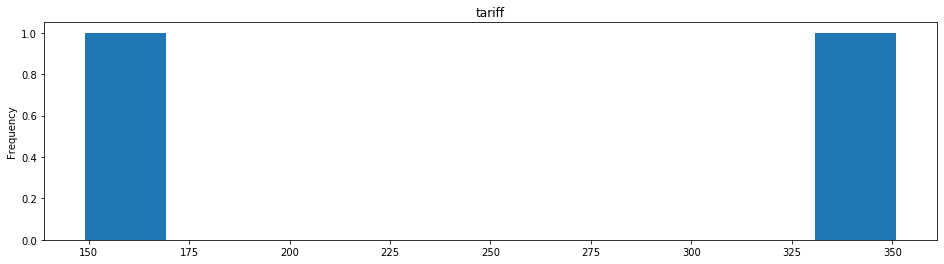

In [9]:
get_info(users)
users.describe()

**Выводы:**

Столбец *user_id*: Без замечаний

Столбец *age*: Без замечаний

Столбец *churn_date*: Конвертировать в тип *datetime*. Присутсвуют осознанные пропуски.

Столбец *city*: Без замечаний

Столбец *first_name*: Без замечаний

Столбец *last_name*: Без замечаний

Столбец *reg_date*: Конвертировать в тип *datetime*

Столбец *tariff*: Без замечаний

## Подготовка данных

### Изменение типов данных

Имеет смысл создать в таблице calls новый столбец с окгруленным в большую сторону значениями минут,а старый столбец не трогать, чтобы не терять данные для оценки среднеко и медианы. В таблице internet не стоит оглуглять трафик с сессий сразу, лучше сделать это когда будет рассчитываться оплата за месяц.

In [10]:
# Столбец duration в таблице calls
calls['minutes'] = calls['duration'].apply(np.ceil)

In [11]:
# Изменениv типs данных на дату создадим столбец с месяцем
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

users['month'] = users['reg_date'].dt.month
users['month'] = users['churn_date'].dt.month
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

### Поиск и исправление ошибок в данных (если есть)

**Проверка на дубликаты и пропуски**

In [12]:
datasets_name = ['calls', 'internet', 'messages', 'tariffs', 'users']
for i in range(5):
    print(f"Таблица {datasets_name[i]} имеет {datasets[i].duplicated().sum()} повторов")
    print(f"Количество пропусков по столбцам:\n{datasets[i].isnull().sum()}")
    print('===================================================================================================================')

Таблица calls имеет 0 повторов
Количество пропусков по столбцам:
id           0
call_date    0
duration     0
user_id      0
minutes      0
month        0
dtype: int64
Таблица internet имеет 0 повторов
Количество пропусков по столбцам:
id              0
mb_used         0
session_date    0
user_id         0
month           0
dtype: int64
Таблица messages имеет 0 повторов
Количество пропусков по столбцам:
id              0
message_date    0
user_id         0
month           0
dtype: int64
Таблица tariffs имеет 0 повторов
Количество пропусков по столбцам:
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
Таблица users имеет 0 повторов
Количество пропусков по столбцам:
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
mon

Ранее было сказано, что пропуски в столбце *churn_date* означаются активный статус подключения тарифа на момент выгрузки данных, поэтому оставим пропуски.

**Выбросы**

Рассмотрим гистрограммы длительности звонков и использованного трафика

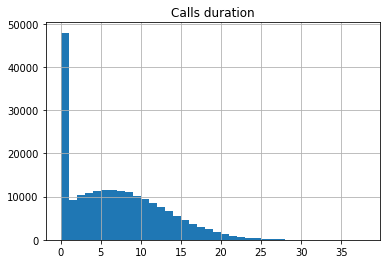

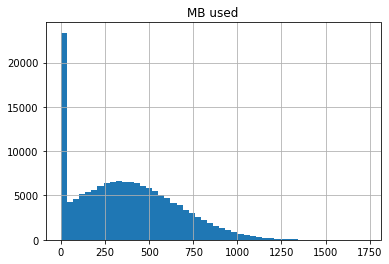

In [13]:
plt.title('Calls duration')
calls['duration'].hist(bins=38)
plt.show()
plt.title('MB used')
internet['mb_used'].hist(bins=50)
plt.show()

По гистограммам видно, что присутсвуют достаточно много пропущенных звонков, которые влияют на среднее и являются выбросами. Также много пользователей не использовали интернет. Создадим новые таблицы для анализа только времени звонков и только используемого трафика, чтобы нулевые значения не портили выборку, изменяя среднюю и медиану.

In [14]:
calls = calls.loc[calls['duration'] != 0]
internet = internet.loc[internet['mb_used'] != 0]

### Расчет значений для каждого пользователя

In [15]:
print(f"Общее количество пользователей: {users.shape[0]}")
print(f"Количество уникальных пользователей в calls: {calls['user_id'].nunique()}")
print(f"Количество уникальных пользователей в internet: {internet['user_id'].nunique()}")
print(f"Количество уникальных пользователей в messages: {messages['user_id'].nunique()}")

Общее количество пользователей: 500
Количество уникальных пользователей в calls: 492
Количество уникальных пользователей в internet: 497
Количество уникальных пользователей в messages: 426


Можно сказать, что не все пользовались своим тарифом по полной: кто-то не звонил, а кто-то не использовал интернет. Однако, их стоит вставить в соответсвующие таблицы, чтобы не терять данные.

**Количество сделанных звонков и израсходованных минут разговора по месяцам**

In [16]:
# Создадим сводную таблицу
calls_history = pd.pivot_table(calls, index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
# Переименуем столбцы
calls_history = calls_history.rename(columns={'count':'number_of_calls', 'sum':'total_spent_time'})
calls_history.columns = calls_history.columns.droplevel(1)
calls_history.head(10)

number_of_calls  total_spent_time
user_id month                                   
1000    5                   17           150.060
        6                   28           158.900
        7                   41           318.800
        8                   42           389.870
        9                   46           440.140
        10                  44           328.450
        11                  37           319.040
        12                  38           312.980
1001    11                  45           408.120
        12                  47           391.340

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера 2</b>
    
Если ты округлил длительность разговоров в новый признак `minutes`, то стоило использовать его группировки данных
</div>


**Количество отправленных сообщений по месяцам**

In [17]:
# Создадим сводную таблицу
messages_history = pd.pivot_table(messages, index=['user_id', 'month'], values='message_date', aggfunc='count')
messages_history.rename(columns={'message_date':'number_of_messages'}, inplace=True)
messages_history.head(10)

number_of_messages
user_id month                    
1000    5                      22
        6                      60
        7                      75
        8                      81
        9                      57
        10                     73
        11                     58
        12                     70
1002    6                       4
        7                      11

**Объем израсходованного интернет-трафика по месяцам**

In [18]:
# Создадим сводную таблицу
internet_history = pd.pivot_table(internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_history.head()

mb_used
user_id month           
1000    5      2,253.490
        6     23,233.770
        7     14,003.640
        8     14,055.930
        9     14,568.910

**Помесячная выручка с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)**

In [19]:
# Создадим сводную таблицу для значений минут и подсчитаем только общее время звонков
calls_history_min = pd.pivot_table(calls, index=['user_id', 'month'], values='minutes', aggfunc='sum')
# Переименуем столбцы
calls_history_min = calls_history_min.rename(columns={'sum':'total_spent_time'})
calls_history_min.head()

minutes
user_id month         
1000    5      159.000
        6      172.000
        7      340.000
        8      408.000
        9      466.000

Посчитаем помесячную выручку от каждого абонента. написав для этого функцию

In [20]:
# Создадим сводную таблину с общей статистикой
total_history = calls_history_min.merge(messages_history, on=['user_id', 'month'], how='outer').merge(
    internet_history, on=['user_id', 'month'], how='outer'
)
# Создадим списки месяцев и услуг 
def get_income(row):    
    # Индекс пользователя
    user_id = row.name[0]
    # Название тарифа
    t_name = list(users.loc[users['user_id'] == user_id, 'tariff'])[0]
    # Ежемесячная плата и лимиты по звонкам, СМС и интернету
    fee = float(tariffs.loc[tariffs['tariff_name'] == t_name, 'rub_monthly_fee'])
    calls_limit = float(tariffs.loc[tariffs['tariff_name'] == t_name, 'minutes_included'])
    internet_limit= float(tariffs.loc[tariffs['tariff_name'] == t_name, 'mb_per_month_included'])
    messages_limit = float(tariffs.loc[tariffs['tariff_name'] == t_name, 'messages_included'])
    calls_price = float(tariffs.loc[tariffs['tariff_name'] == t_name, 'rub_per_minute'])
    internet_price = float(tariffs.loc[tariffs['tariff_name'] == t_name, 'rub_per_gb'])
    messages_price = float(tariffs.loc[tariffs['tariff_name'] == t_name, 'rub_per_message'])
        
    calls = row['minutes']
    messages = row['number_of_messages']
    internet = row['mb_used']
    income = fee + max(0, calls - calls_limit) * calls_price + max(0, np.ceil((internet - internet_limit) / 1024)) \
    * internet_price + max(0, messages - messages_limit) * messages_price
    return int(income)
        
total_history['income'] = total_history.apply(get_income, axis=1) 
total_history.head()

minutes  number_of_messages    mb_used  income
user_id month                                                
1000    5      159.000              22.000  2,253.490    1950
        6      172.000              60.000 23,233.770    1950
        7      340.000              75.000 14,003.640    1950
        8      408.000              81.000 14,055.930    1950
        9      466.000              57.000 14,568.910    1950

## Анализ данных

In [21]:
# Переназначил название здесь, чтобы не менять в других местах
total_stat = total_history
# Добавим название тарифа
total_stat = total_stat.merge(users[['user_id', 'tariff']], on='user_id', how='left').set_index('user_id')
total_stat.head()

,minutes,number_of_messages,mb_used,income,tariff
user_id,,,,,
1000,159.000,22.000,"2,253.490",1950,ultra
1000,172.000,60.000,"23,233.770",1950,ultra
1000,340.000,75.000,"14,003.640",1950,ultra
1000,408.000,81.000,"14,055.930",1950,ultra
1000,466.000,57.000,"14,568.910",1950,ultra


Параметры тарифа ultra
Среднее значение: 547.7550
Дисперсия: 93338.4283
Стандартное отклонение: 305.5134

Параметры тарифа smart
Среднее значение: 419.4403
Дисперсия: 35718.1285
Стандартное отклонение: 188.9924



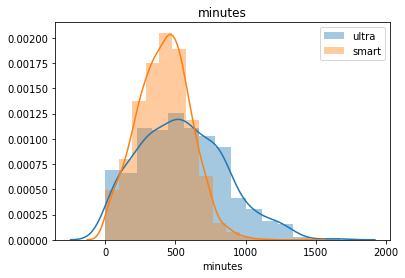

Параметры тарифа ultra
Среднее значение: 19688.6788
Дисперсия: 98567864.3284
Стандартное отклонение: 9928.1350

Параметры тарифа smart
Среднее значение: 16222.9432
Дисперсия: 34257208.7307
Стандартное отклонение: 5852.9658



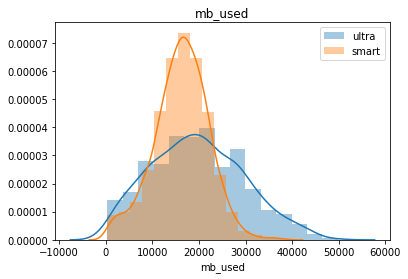

Параметры тарифа ultra
Среднее значение: 61.1610
Дисперсия: 2109.6592
Стандартное отклонение: 45.9310

Параметры тарифа smart
Среднее значение: 38.7164
Дисперсия: 717.5942
Стандартное отклонение: 26.7879



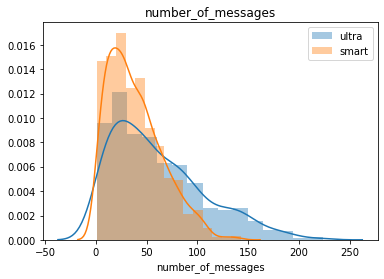

In [22]:
services = ['minutes','mb_used', 'number_of_messages']
tariffs_list = users['tariff'].unique()
for service in services:    
    plt.show()
    for tariff in tariffs_list:
        # Построим распределения
        sns.distplot(total_stat.loc[total_stat['tariff'] == tariff, service], label=tariff,bins=15)
        print(f"Параметры тарифа {tariff}")
        print(f"Среднее значение: {total_stat.loc[total_stat['tariff'] == tariff, service].mean():.4f}")
        print(f"Дисперсия: {total_stat.loc[total_stat['tariff'] == tariff, service].var():.4f}")
        print(f"Стандартное отклонение: {total_stat.loc[total_stat['tariff'] == tariff, service].std():.4f}")
        print()
    plt.legend()
    plt.title(service)
    plt.show()

**Выводы:** 

В среднем пользователи тарифа *ultra* тратят на 2 часа в месяц больше на разговоры. В дополнение размах почти в 2 раза больше, чем у пользователей *smart*. Распределения близки к нормальному, но присутсвуют небольше скосы влево для *smart* и вправо для *ultra*.

В среднем пользователи *ultra* потребляют на 3,5 Гб больше трафика, а размах больше, чем в 2 раза. В целом оба распределения близки к нормальному.

Пользователи *ultra* пишут СМС в 1,7 чаще с размахом в 2 раза больше. Для обоих тарифов распределения явно скошены вправо

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [23]:
# Создадим выборки с выручкой от разных тарифов
income_smart = total_stat.loc[total_stat['tariff'] == 'smart', 'income']
income_ultra = total_stat.loc[total_stat['tariff'] == 'ultra', 'income']

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются

Альтернативная одностороняя гипотеза: средняя выручка пользователей тарифа «Ультра» больше, чем у «Смарт»

Будем использовать t-критерий Стьюдента для сравнения среднего двух выборок.

In [24]:
alpha = 0.05
results = st.ttest_ind(income_smart, income_ultra)
print(f"р-значение = {results.pvalue}")
if (results.pvalue / 2 < alpha) & (income_ultra.mean() > income_smart.mean()):
    print(f"Отвергаем нулевую гипотезу. Тариф ultra приносит больше прибыли на {abs(income_smart.mean() - income_ultra.mean()):.0f} рублей в среднем в месяц")
else:
    print("Не отвергаем нулевую гипотезу, средние выручки считаем равными.")

р-значение = 1.4229814360764067e-160
Отвергаем нулевую гипотезу. Тариф ultra приносит больше прибыли на 780 рублей в среднем в месяц


### Cредняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

In [25]:
# Добавим столбец с городом пользователя
total_stat = total_stat.merge(users[['user_id', 'city']], on='user_id', how='left')
total_stat.head()

,user_id,minutes,number_of_messages,mb_used,income,tariff,city
0,1000,159.000,22.000,"2,253.490",1950,ultra,Краснодар
1,1000,172.000,60.000,"23,233.770",1950,ultra,Краснодар
2,1000,340.000,75.000,"14,003.640",1950,ultra,Краснодар
3,1000,408.000,81.000,"14,055.930",1950,ultra,Краснодар
4,1000,466.000,57.000,"14,568.910",1950,ultra,Краснодар


In [26]:
# Создадим выборки с выручкой от Москвы и остальных городов
income_Moscow = total_stat.loc[total_stat['city'] == 'Москва', 'income']
income_others = total_stat.loc[total_stat['city'] != 'Москва', 'income']

Нулевая гипотеза: средняя выручка пользователей из Москвы НЕ отличатеся от выручки с других городов

Альтернативная гипотеза: средняя выручка пользователей из Москвы отличатеся от выручки с других городов

Будем использовать t-критерий Стьюдента для сравнения среднего двух выборок.

In [27]:
alpha = 0.05
results = st.ttest_ind(income_Moscow, income_others)
print(f"р-значение = {results.pvalue}")
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, доход от Москвы и других городов отличаются.")
else:
    print("Не отвергаем нулевую гипотезу, доход от Москвы и других городов равны.")

р-значение = 0.5440152911670224
Не отвергаем нулевую гипотезу, доход от Москвы и других городов равны.


## Выводы

В данном проекте были реализованы методы предобработки данных, методы графического анализа и методы проверок гипотез.

По результатам сравнения тарифов можно выделить следующие основные моменты:

 - В среднем пользователи тарифа *ultra* звонят на 2 часа в месяц больше при среднем времени 540 мин, на 3,5 ГБ больше используют интернет трафик при среднем значении 19,7 Гб и пишут на 30 СМС больше при среднем 64. Для всех услуг разброс для тарифа *ultra* приблизительно в 2 раза больше.
 
 - В среднем в месяц тариф *ultra* приносит на 780 рублей больше 
 
 - Распределения среднего интернет трафика и помесячной длительности звонков близки к нормальному, распределение использования СМС явно скошено вправо
 
 - Гипотеза о равенстве выручки с двух тарифов отвергнута при уровне значимости 5%, значит не зря делали второй тариф
 
 - Гипотезе о равенсте выручки с Москвы и других городов не отвергнута при уровне значимости 5%